In [2]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from mpl_toolkits.axes_grid1 import AxesGrid, make_axes_locatable
from glob import glob
import xarray as xr
import pandas as pd
import numpy as np1
from pyresample import geometry, create_area_def
from satpy import Scene
from cartopy.mpl.geoaxes import GeoAxes
import cmocean
import cmocean.cm as cmo
import matplotlib.cm as cm
from matplotlib import ticker

In [17]:
year = '2020'
cfile = glob('/home/hboi-ouri/Projects/RS_Files/Chlorophyll/MonthCombined/*_'+ year +'_MODIS_L2.nc')
cfile.sort()
ds = xr.open_dataset(cfile[1])
ds

<xarray.Dataset>
Dimensions:  (y: 380, x: 542, time: 45)
Coordinates:
  * y        (y) float64 2.816e+05 2.806e+05 2.796e+05 ... -9.623e+04 -9.723e+04
  * x        (x) float64 -2.36e+05 -2.35e+05 -2.34e+05 ... 3.035e+05 3.045e+05
    lon      (y, x) float64 ...
    lat      (y, x) float64 ...
  * time     (time) datetime64[ns] 2020-02-01T19:35:00.519000 ... 2020-02-29T...
Data variables:
    chlor_a  (time, y, x) float32 ...
Attributes: (12/48)
    title:                          MODISA Level-2 Data
    product_name:                   AQUA_MODIS.20200201T193500.L2.OC.nc
    processing_version:             R2022.0
    equatorCrossingLongitude:       79.16369
    orbit_number:                   94403
    history:                        l2gen par=/data4/sdpsoper/vdc/vpu3/workbu...
    ...                             ...
    geospatial_lon_max:             -86.50762
    geospatial_lon_min:             -95.1615
    startDirection:                 Ascending
    endDirection:                   Ascending
    day_night_flag:                 Day
    earth_sun_distance_correction:  1.029984712600708

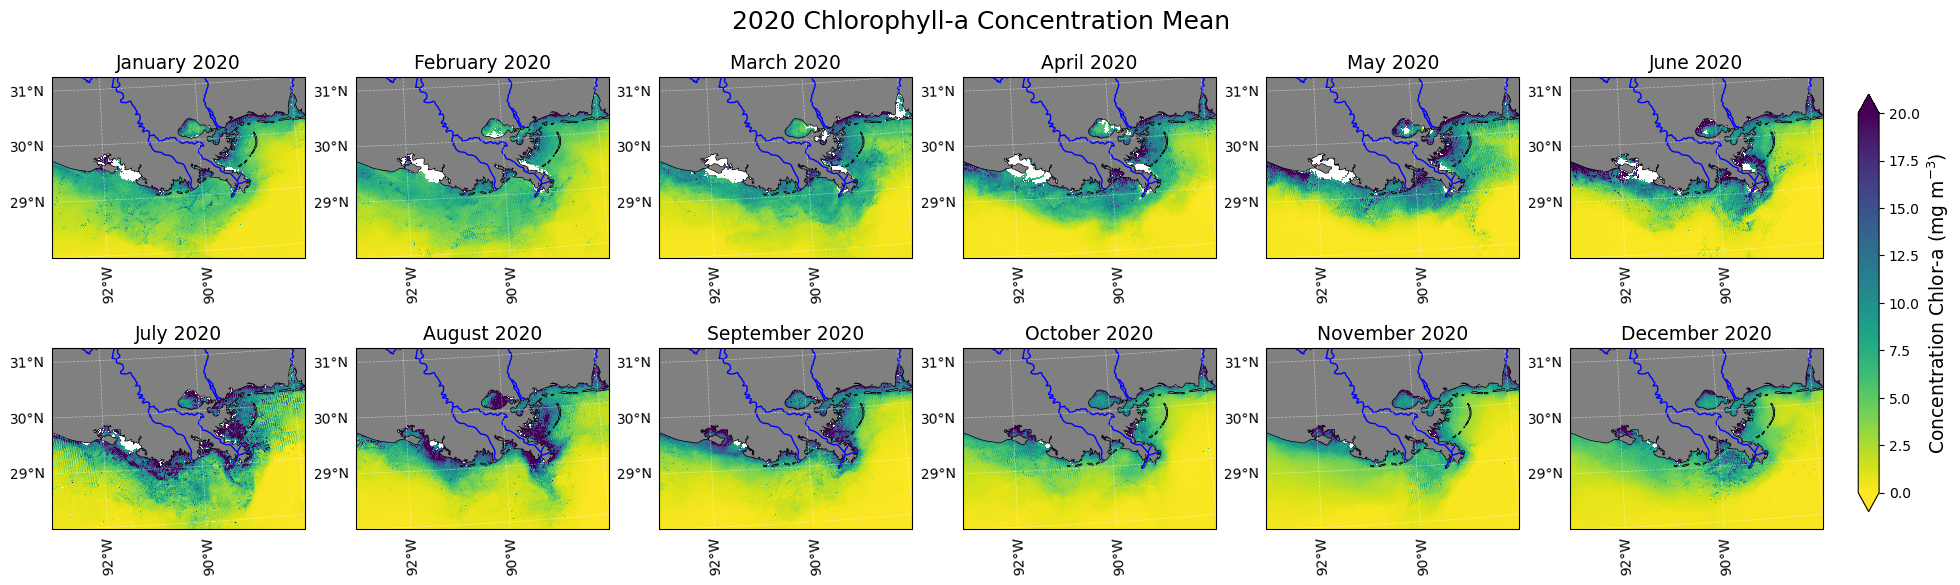

In [39]:
year = '2020'
cfile = glob('/home/hboi-ouri/Projects/RS_Files/Chlorophyll/MonthCombined/*_'+ year +'_MODIS_L2.nc')
cfile.sort()

lat_top=31
lat_bot=28
lon_left=-93
lon_rigth=-88
extent=[lon_left, lon_rigth, lat_bot, lat_top]

resval = 1000 # resolution of the sat product (300 m for Sentinel and MERIS, 1 km for MODIS)
res = xr.DataArray(resval, attrs={"units": "meters"})

projection = ccrs.PlateCarree()
fig, axgr = plt.subplots(2, 6, constrained_layout=True, figsize=(19.5, 5.75),
                             subplot_kw={'projection':ccrs.LambertConformal()})
        

title = ['January '+year, 'February '+year, 'March '+year, 'April '+year, 'May '+year, 'June '+year,
         'July '+year, 'August '+year, 'September '+year, 'October '+year, 'November '+year, 'December '+year]

# title = ['January 2022', 'February 2022', 'March 2022', 'April 2022', 'May 2022', 'June 2022',
#          'July 2022', 'August 2022', 'September 2022', 'October 2022', 'November 2022', 'December 2022']


for i, ax in enumerate(axgr.flatten()):
    try:
        ds = xr.open_dataset(cfile[i])
        data = ds.chlor_a.mean('time')

        im = data.where(data!=0).plot(ax=ax, vmin=0, vmax=20, 
                                      x='lon', y='lat', 
                                      add_colorbar=False,
                                     transform=ccrs.PlateCarree(),
                                     cmap='viridis_r')
        ax.coastlines()
        ax.set_extent(extent)
        ax.add_feature(cfeature.NaturalEarthFeature(category='physical', 
                                                    name='land',
                                                    facecolor='grey', # change color here
                                                    scale='10m')) 
        ax.add_feature(cfeature.NaturalEarthFeature(category='physical', 
                                                    name='rivers_lake_centerlines',
                                                    edgecolor='blue', # change color here
                                                    facecolor='none',
                                                scale='10m'))
        gl = ax.gridlines(crs=ccrs.PlateCarree(),
             ylocs=[28, 29, 30, 31], 
             xlocs=[-94, -92, -90, -88], 
             draw_labels=True, linewidth=0.5, color='w', alpha=0.5, linestyle='--', x_inline=False, y_inline=False)
        gl.right_labels = False
        gl.top_labels = False
        ax.set_title(title[i], fontsize=13.5)
        ax.set_ylabel('Latitude')
        ax.set_xlabel('Longitude')
        
        
    except:
        ax.remove()
        pass
    
fig.suptitle(year+' Chlorophyll-a Concentration Mean', size=18)
cb = fig.colorbar(im, ax=axgr, shrink=0.8, extend='both', pad=0.02)
cb.set_label('Concentration Chlor-a (mg m$^{-3}$)', size=13.5)
fig.savefig('/home/hboi-ouri/Projects/NASA_ProjectExp/outputs/Chlorophyll/'+year+'YearMean.png')

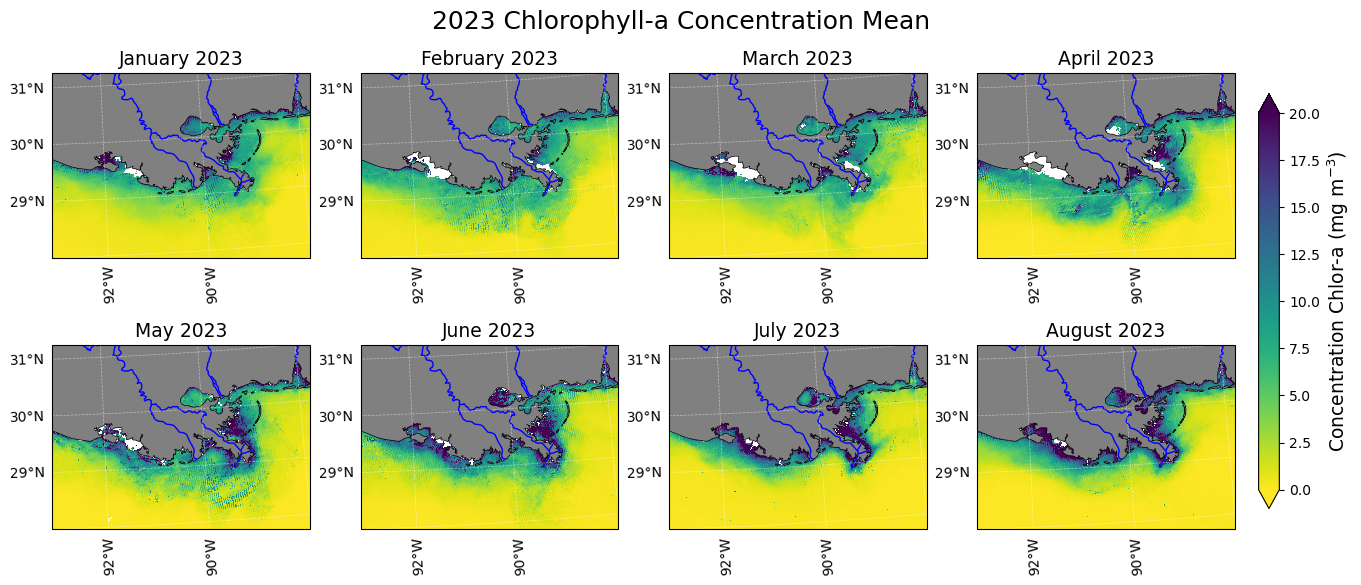

In [40]:
year = '2023'
cfile = glob('/home/hboi-ouri/Projects/RS_Files/Chlorophyll/MonthCombined/*_'+ year +'_MODIS_L2.nc')
cfile.sort()

lat_top=31
lat_bot=28
lon_left=-93
lon_rigth=-88
extent=[lon_left, lon_rigth, lat_bot, lat_top]

resval = 1000 # resolution of the sat product (300 m for Sentinel and MERIS, 1 km for MODIS)
res = xr.DataArray(resval, attrs={"units": "meters"})

projection = ccrs.PlateCarree()
fig, axgr = plt.subplots(2, 4, constrained_layout=True, figsize=(13.5, 5.75),
                             subplot_kw={'projection':ccrs.LambertConformal()})
        

title = ['January '+year, 'February '+year, 'March '+year, 'April '+year, 'May '+year, 'June '+year,
         'July '+year, 'August '+year]

# title = ['January 2022', 'February 2022', 'March 2022', 'April 2022', 'May 2022', 'June 2022',
#          'July 2022', 'August 2022', 'September 2022', 'October 2022', 'November 2022', 'December 2022']


for i, ax in enumerate(axgr.flatten()):
    try:
        ds = xr.open_dataset(cfile[i])
        data = ds.chlor_a.mean('time')

        im = data.where(data!=0).plot(ax=ax, vmin=0, vmax=20, 
                                      x='lon', y='lat', 
                                      add_colorbar=False,
                                     transform=ccrs.PlateCarree(),
                                     cmap='viridis_r')
        ax.coastlines()
        ax.set_extent(extent)
        ax.add_feature(cfeature.NaturalEarthFeature(category='physical', 
                                                    name='land',
                                                    facecolor='grey', # change color here
                                                    scale='10m')) 
        ax.add_feature(cfeature.NaturalEarthFeature(category='physical', 
                                                    name='rivers_lake_centerlines',
                                                    edgecolor='blue', # change color here
                                                    facecolor='none',
                                                scale='10m'))
        gl = ax.gridlines(crs=ccrs.PlateCarree(),
             ylocs=[28, 29, 30, 31], 
             xlocs=[-94, -92, -90, -88], 
             draw_labels=True, linewidth=0.5, color='w', alpha=0.5, linestyle='--', x_inline=False, y_inline=False)
        gl.right_labels = False
        gl.top_labels = False
        ax.set_title(title[i], fontsize=13.5)
        ax.set_ylabel('Latitude')
        ax.set_xlabel('Longitude')
        
        
    except:
        ax.remove()
        pass
    
fig.suptitle(year+' Chlorophyll-a Concentration Mean', size=18)
cb = fig.colorbar(im, ax=axgr, shrink=0.8, extend='both', pad=0.02)
cb.set_label('Concentration Chlor-a (mg m$^{-3}$)', size=13.5)

fig.savefig('/home/hboi-ouri/Projects/NASA_ProjectExp/outputs/Chlorophyll/'+year+'YearMean.png')

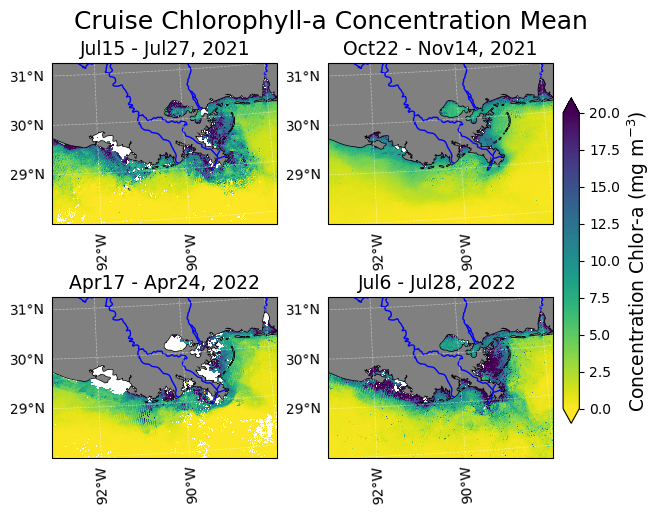

In [4]:
cfile = glob('/home/hboi-ouri/Projects/RS_Files/Chlorophyll/CruiseCombined/*_MODIS_L2.nc')
cfile.sort()

lat_top=31
lat_bot=28
lon_left=-93
lon_rigth=-88
extent=[lon_left, lon_rigth, lat_bot, lat_top]

resval = 1000 # resolution of the sat product (300 m for Sentinel and MERIS, 1 km for MODIS)
res = xr.DataArray(resval, attrs={"units": "meters"})

projection = ccrs.PlateCarree()
fig, axgr = plt.subplots(2,2, constrained_layout=True, figsize=(6.5, 5),
                             subplot_kw={'projection':ccrs.LambertConformal()})
        

title = ['Jul15 - Jul27, 2021', 'Oct22 - Nov14, 2021', 'Apr17 - Apr24, 2022', 'Jul6 - Jul28, 2022 ']

# title = ['January 2022', 'February 2022', 'March 2022', 'April 2022', 'May 2022', 'June 2022',
#          'July 2022', 'August 2022', 'September 2022', 'October 2022', 'November 2022', 'December 2022']


for i, ax in enumerate(axgr.flatten()):
    try:
        ds = xr.open_dataset(cfile[i])
        data = ds.chlor_a.mean('time')

        im = data.where(data!=0).plot(ax=ax, vmin=0, vmax=20, 
                                      x='lon', y='lat', 
                                      add_colorbar=False,
                                     transform=ccrs.PlateCarree(),
                                     cmap='viridis_r')
        ax.coastlines()
        ax.set_extent(extent)
        ax.add_feature(cfeature.NaturalEarthFeature(category='physical', 
                                                    name='land',
                                                    facecolor='grey', # change color here
                                                    scale='10m')) 
        ax.add_feature(cfeature.NaturalEarthFeature(category='physical', 
                                                    name='rivers_lake_centerlines',
                                                    edgecolor='blue', # change color here
                                                    facecolor='none',
                                                scale='10m'))
        gl = ax.gridlines(crs=ccrs.PlateCarree(),
             ylocs=[28, 29, 30, 31], 
             xlocs=[-94, -92, -90, -88], 
             draw_labels=True, linewidth=0.5, color='w', alpha=0.5, linestyle='--', x_inline=False, y_inline=False)
        gl.right_labels = False
        gl.top_labels = False
        ax.set_title(title[i], fontsize=13.5)
        ax.set_ylabel('Latitude')
        ax.set_xlabel('Longitude')
        
        
    except:
        ax.remove()
        pass
    
fig.suptitle('Cruise Chlorophyll-a Concentration Mean', size=18)
cb = fig.colorbar(im, ax=axgr, shrink=0.8, extend='both', pad=0.02)
cb.set_label('Concentration Chlor-a (mg m$^{-3}$)', size=13.5)

fig.savefig('/home/hboi-ouri/Projects/NASA_ProjectExp/outputs/Chlorophyll/CruiseMean.png')

In [13]:

cruise = 'SU2021'
cfile = glob('/home/hboi-ouri/Projects/RS_Files/Chlorophyll/CruiseDailyCombined/'+cruise+'/*_MODIS_L2.nc')
cfile.sort()
cfile[1][73:81]

cfile[1][73:77]+'-'+cfile[1][77:79]+'-'+cfile[1][79:81]

'2021-07-16'

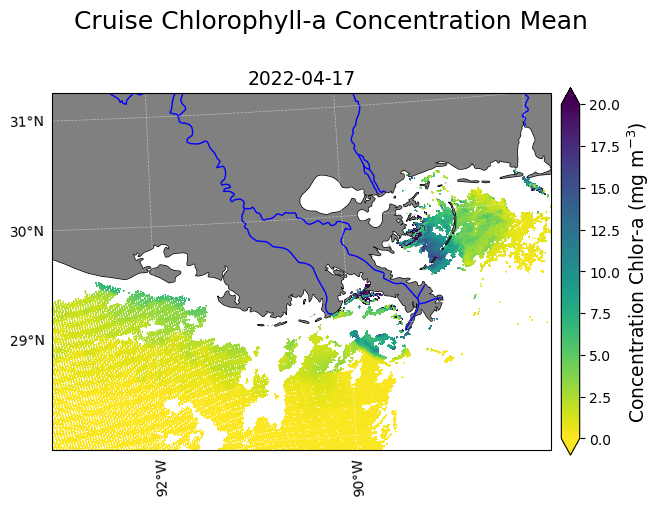

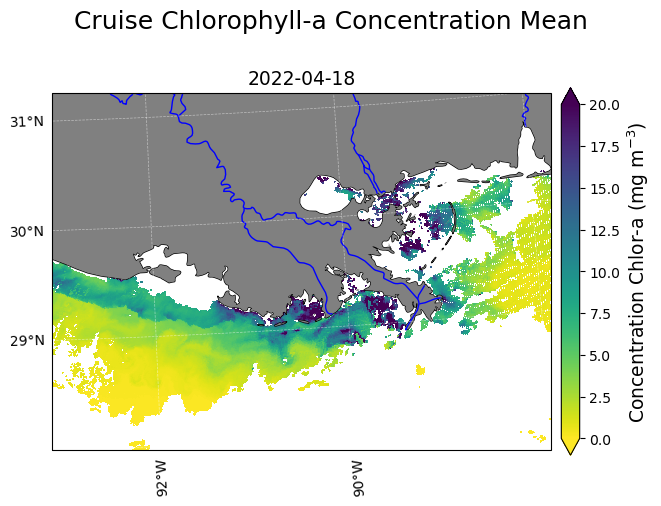

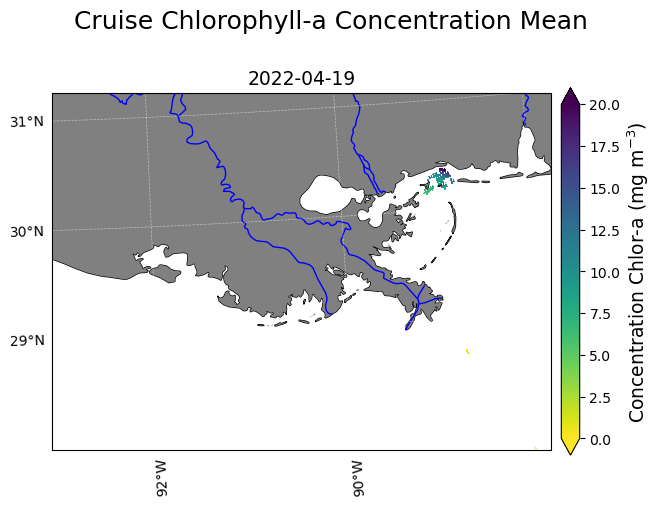

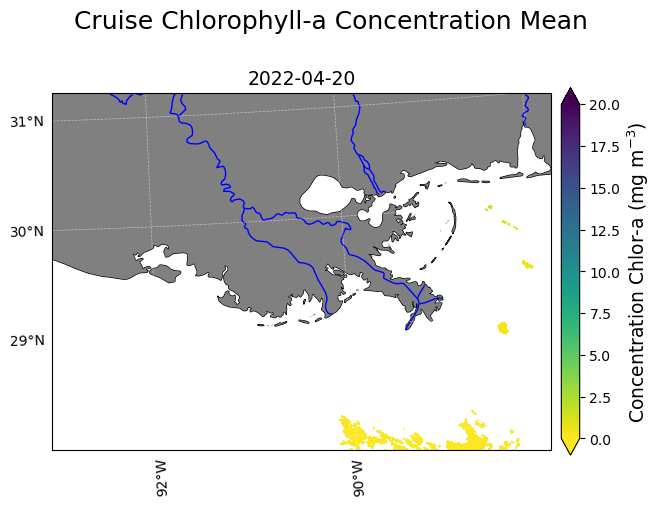

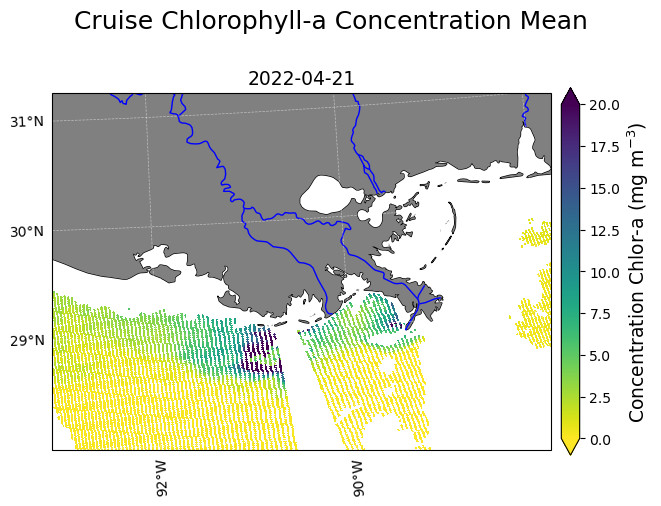

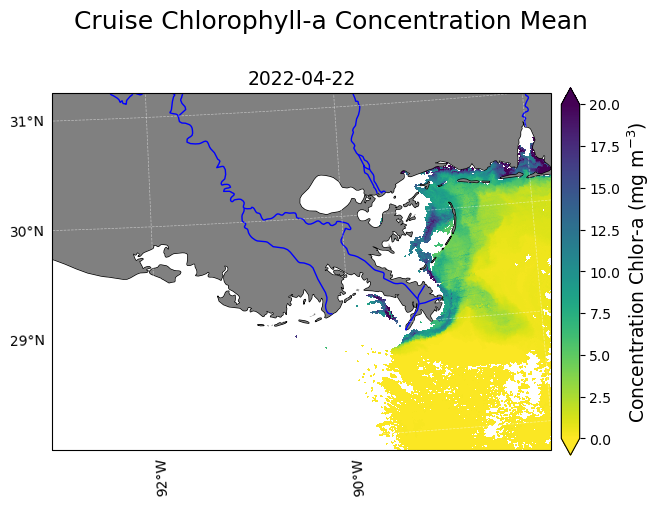

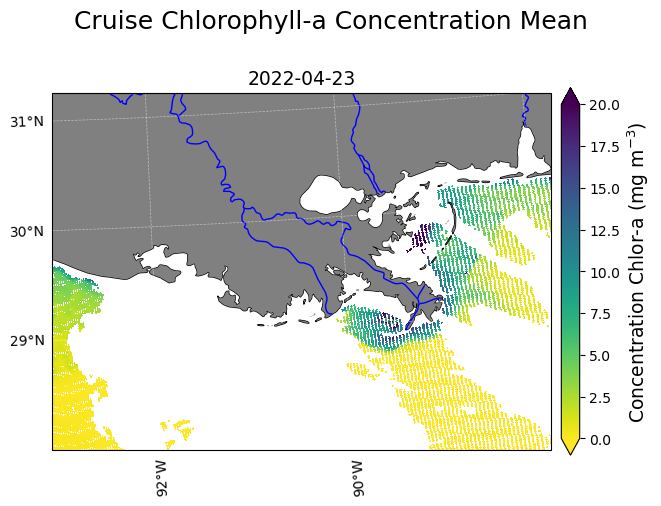

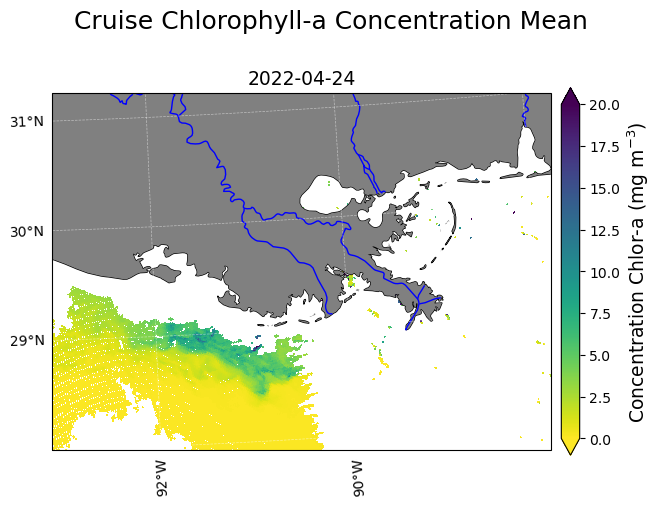

In [9]:
cruise = 'SP2022'
cfile = glob('/home/hboi-ouri/Projects/RS_Files/Chlorophyll/CruiseDailyCombined/'+cruise+'/*_MODIS_L2.nc')
cfile.sort()
days = []
for file in cfile:
    days.append(file[73:81])

lat_top=31
lat_bot=28
lon_left=-93
lon_rigth=-88
extent=[lon_left, lon_rigth, lat_bot, lat_top]

resval = 1000 # resolution of the sat product (300 m for Sentinel and MERIS, 1 km for MODIS)
res = xr.DataArray(resval, attrs={"units": "meters"})

projection = ccrs.PlateCarree()





for day in days:
    fig, axgr = plt.subplots(1,1, constrained_layout=True, figsize=(6.5, 5),
                         subplot_kw={'projection':ccrs.LambertConformal()})

    cfile = '/home/hboi-ouri/Projects/RS_Files/Chlorophyll/CruiseDailyCombined/'+cruise+'/'+day+'_MODIS_L2.nc'
    ds = xr.open_dataset(cfile)
    data = ds.chlor_a.mean('time')

    im = data.where(data!=0).plot(ax=axgr, vmin=0, vmax=20, 
                                  x='lon', y='lat', 
                                  add_colorbar=False,
                                 transform=ccrs.PlateCarree(),
                                 cmap='viridis_r')
    axgr.coastlines()
    axgr.set_extent(extent)
    axgr.add_feature(cfeature.NaturalEarthFeature(category='physical', 
                                                name='land',
                                                facecolor='grey', # change color here
                                                scale='10m')) 
    axgr.add_feature(cfeature.NaturalEarthFeature(category='physical', 
                                                name='rivers_lake_centerlines',
                                                edgecolor='blue', # change color here
                                                facecolor='none',
                                            scale='10m'))
    gl = axgr.gridlines(crs=ccrs.PlateCarree(),
         ylocs=[28, 29, 30, 31], 
         xlocs=[-94, -92, -90, -88], 
         draw_labels=True, linewidth=0.5, color='w', alpha=0.5, linestyle='--', x_inline=False, y_inline=False)
    gl.right_labels = False
    gl.top_labels = False
    axgr.set_title(cfile[73:77]+'-'+cfile[77:79]+'-'+cfile[79:81], fontsize=13.5)
    axgr.set_ylabel('Latitude')
    axgr.set_xlabel('Longitude')


   

    fig.suptitle('Cruise Chlorophyll-a Concentration Mean', size=18)
    cb = fig.colorbar(im, ax=axgr, shrink=0.8, extend='both', pad=0.02)
    cb.set_label('Concentration Chlor-a (mg m$^{-3}$)', size=13.5)

    fig.savefig('/home/hboi-ouri/Projects/NASA_ProjectExp/outputs/Chlorophyll/'+cruise+'/'+day+'Mean.png')

In [11]:
from celluloid import Camera


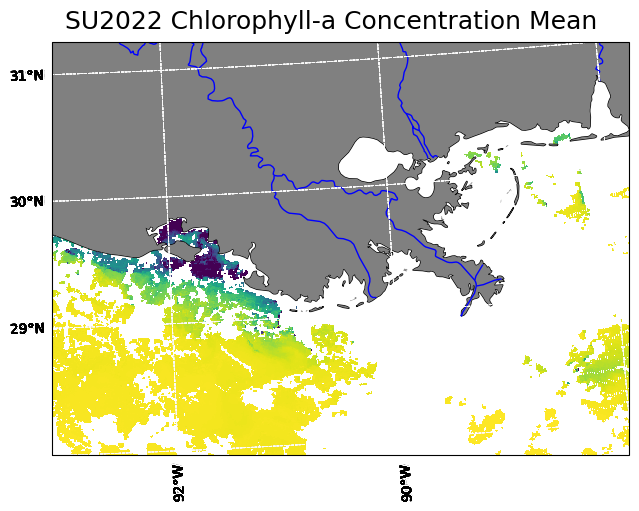

In [35]:
cruise = 'SU2022'
cfile = glob('/home/hboi-ouri/Projects/RS_Files/Chlorophyll/CruiseDailyCombined/'+cruise+'/*_MODIS_L2.nc')
cfile.sort()
days = []
for file in cfile:
    days.append(file[73:81])

lat_top=31
lat_bot=28
lon_left=-93
lon_rigth=-88
extent=[lon_left, lon_rigth, lat_bot, lat_top]

resval = 1000 # resolution of the sat product (300 m for Sentinel and MERIS, 1 km for MODIS)
res = xr.DataArray(resval, attrs={"units": "meters"})

projection = ccrs.PlateCarree()

fig, axgr = plt.subplots(1,1, constrained_layout=True, figsize=(6.5, 5),
                         subplot_kw={'projection':ccrs.LambertConformal()})

camera = Camera(fig)



for day in days:
    

    cfile = '/home/hboi-ouri/Projects/RS_Files/Chlorophyll/CruiseDailyCombined/'+cruise+'/'+day+'_MODIS_L2.nc'
    ds = xr.open_dataset(cfile)
    data = ds.chlor_a.mean('time')

    im = data.where(data!=0).plot(ax=axgr, vmin=0, vmax=20, 
                                  x='lon', y='lat', 
                                  add_colorbar=False,
                                 transform=ccrs.PlateCarree(),
                                 cmap='viridis_r')
    axgr.coastlines()
    axgr.set_extent(extent)
    axgr.add_feature(cfeature.NaturalEarthFeature(category='physical', 
                                                name='land',
                                                facecolor='grey', # change color here
                                                scale='10m')) 
    axgr.add_feature(cfeature.NaturalEarthFeature(category='physical', 
                                                name='rivers_lake_centerlines',
                                                edgecolor='blue', # change color here
                                                facecolor='none',
                                            scale='10m'))
    gl = axgr.gridlines(crs=ccrs.PlateCarree(),
         ylocs=[28, 29, 30, 31], 
         xlocs=[-94, -92, -90, -88], 
         draw_labels=True, linewidth=0.5, color='w', alpha=0.5, linestyle='--', x_inline=False, y_inline=False)
    gl.right_labels = False
    gl.top_labels = False
#     axgr.set_title(cfile[73:77]+'-'+cfile[77:79]+'-'+cfile[79:81], fontsize=13.5)
    axgr.set_ylabel('Latitude')
    axgr.set_xlabel('Longitude')


   

    fig.suptitle(cruise+' Chlorophyll-a Concentration Mean', size=18)
#     cb = fig.colorbar(im, ax=axgr, shrink=0.8, extend='both', pad=0.02)
#     cb.set_label('Concentration Chlor-a (mg m$^{-3}$)', size=13.5)
    camera.snap()


animation = camera.animate(interval=1000)
animation.save('/home/hboi-ouri/Projects/NASA_ProjectExp/outputs/Chlorophyll/'+ cruise +'/'+cruise+'animation.mp4')